Initial data head:
   age  gender   bmi  children smoker region       charges
0   56  female  31.8         4     no  south  34612.090559
1   46    male  36.0         3     no   east  30882.021297
2   32  female  32.3         2     no  south  21654.084538
3   60    male  22.5         0    yes   west  40860.129896
4   25  female  24.0         2     no  south  18573.337787

Missing Values:
 age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


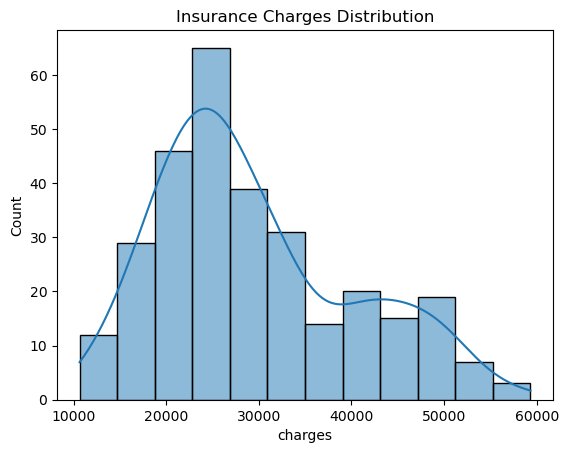

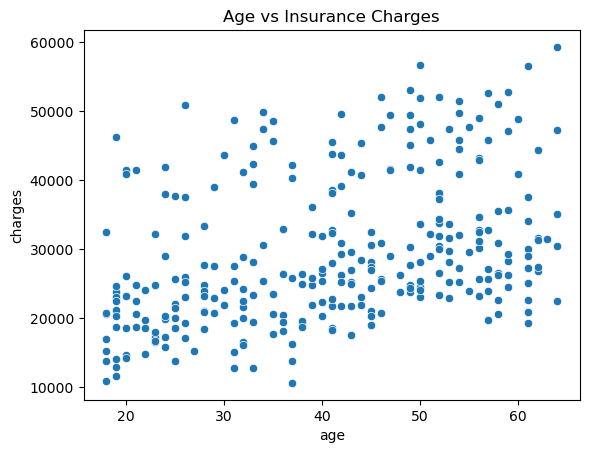

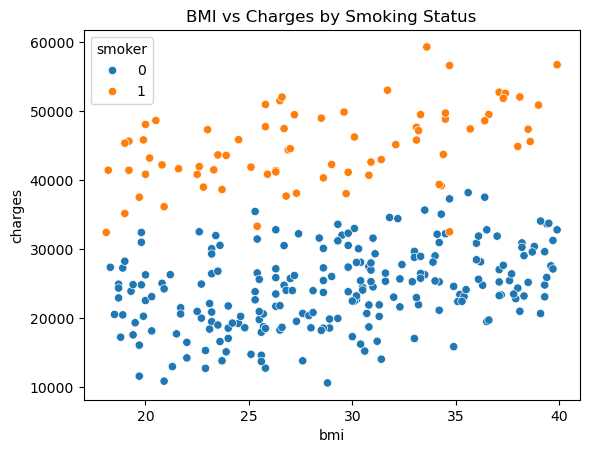


--- Model Performance ---
RMSE: 3376.7728962774095
R2 Score: 0.9007218175579731

Cleaned data exported to 'Medical_Insurance_Cleaned_Data.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Dataset Creation (Realistic Insurance Data)
# --------------------------------------------
np.random.seed(42)

data = pd.DataFrame({
    "age": np.random.randint(18, 65, 300),
    "gender": np.random.choice(["male", "female"], 300),
    "bmi": np.round(np.random.uniform(18, 40, 300), 1),
    "children": np.random.randint(0, 5, 300),
    "smoker": np.random.choice(["yes", "no"], 300, p=[0.25, 0.75]),
    "region": np.random.choice(["north", "south", "east", "west"], 300)
})

# Generating 'charges' based on a realistic formula
data["charges"] = (
    250 * data["age"] +
    350 * data["bmi"] +
    2000 * data["children"] +
    np.where(data["smoker"] == "yes", 20000, 0) +
    np.random.normal(0, 3000, 300)
)

print("Initial data head:")
print(data.head())

# 2. Data Cleaning
# ----------------
# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

# Remove unrealistic BMI outliers
data = data[(data["bmi"] >= 18) & (data["bmi"] <= 45)]

# 3. Encoding Categorical Variables
# --------------------------------
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["smoker"] = le.fit_transform(data["smoker"])
data["region"] = le.fit_transform(data["region"])

# 4. Exploratory Data Analysis (EDA)
# ----------------------------------
# Insurance Charges Distribution
plt.figure()
sns.histplot(data["charges"], kde=True)
plt.title("Insurance Charges Distribution")
plt.show()

# Age vs Insurance Charges
plt.figure()
sns.scatterplot(x="age", y="charges", data=data)
plt.title("Age vs Insurance Charges")
plt.show()

# BMI vs Charges by Smoking Status
plt.figure()
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=data)
plt.title("BMI vs Charges by Smoking Status")
plt.show()

# 5. Feature Engineering – Risk Segmentation
# -----------------------------------------
data["risk_segment"] = np.where(
    (data["smoker"] == 1) | (data["bmi"] > 30),
    "High Risk",
    "Low Risk"
)

# 6. Model Building – Premium Prediction
# --------------------------------------
# Prepare data for training (dropping the target and the non-numeric risk_segment)
X = data.drop(["charges", "risk_segment"], axis=1)
y = data["charges"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Model Performance ---")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# 7. Export Cleaned Data for Power BI / Tableau
# ---------------------------------------------
data.to_csv("Medical_Insurance_Cleaned_Data.csv", index=False)
print("\nCleaned data exported to 'Medical_Insurance_Cleaned_Data.csv'")